In [1]:
"""Optimizacion con restricciones"""
# Ch 6 de Numerical Python

'Optimizacion con restricciones'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.sans-serif'] = 'stix'

In [3]:
import numpy as np
from scipy import optimize

In [4]:
import sympy

In [5]:
sympy.init_printing()

In [6]:
from __future__ import division

In [7]:
def f(X):                # Definicion de funcion vectorizada a minimizar, X.shape = (n,), para el n que venga
    x, y = X
    return (x-1)**2 + (y-1)**2

In [8]:
x_opt = optimize.minimize(f, [0, 0], method='BFGS').x   # Solucion del problema sin restricciones
x_opt

array([0.99999999, 0.99999999])

In [9]:
bnd_x1, bnd_x2 = (2, 3), (0, 2)   # Estas van a ser la restricciones de desigualdad 2<x1<3, 0<x2<2

In [10]:
x_cons_opt = optimize.minimize(f, [0, 0], method='L-BFGS-B', bounds=[bnd_x1, bnd_x2]).x  # Optimizador con restricciones
x_cons_opt

array([2., 1.])

In [11]:
def func_X_Y_to_XY(f, X, Y):          # necesitamos esto para graficar
    s = np.shape(X)
    return f(np.vstack([X.ravel(), Y.ravel()])).reshape(*s)

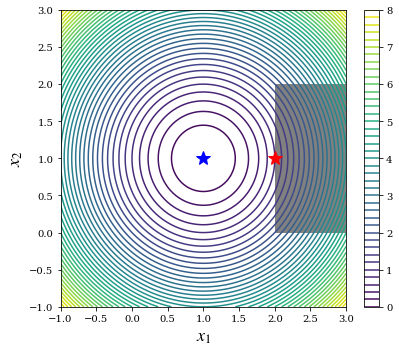

In [12]:
fig, ax = plt.subplots(figsize=(6, 5))
x_ = y_ = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'b*', markersize=15)
ax.plot(x_cons_opt[0], x_cons_opt[1], 'r*', markersize=15)
bound_rect = plt.Rectangle((bnd_x1[0], bnd_x2[0]), 
                           bnd_x1[1] - bnd_x1[0], bnd_x2[1] - bnd_x2[0],
                           facecolor="grey")
ax.add_patch(bound_rect)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)

fig.tight_layout()
fig.savefig('OptConRestr1.pdf');

In [13]:
# Vemos que vale para cualquier dimension
A = np.array([1,1,2])

In [14]:
def f(X):                # Definicion de funcion vectorizada a minimizar, X.shape = (n,)
    return np.dot(X-A,X-A)

In [15]:
x_opt = optimize.minimize(f, [0, 0, 0], method='BFGS').x   # Solucion del problema sin restricciones
x_opt

array([0.99999999, 0.99999999, 1.99999999])

In [16]:
bnd_x1, bnd_x2, bnd_x3 = (2, 3), (0, 2), (0, 1)   # Estas van a ser la restricciones de desigualdad 2<x1<3, 0<x2<2

In [17]:
x_cons_opt = optimize.minimize(f, [0, 0, 0], method='L-BFGS-B', bounds=[bnd_x1, bnd_x2, bnd_x3]).x  # Optimizador con restricciones
x_cons_opt

array([2.        , 0.99999999, 1.        ])

In [18]:
"""Multiplicadores de Lagrange
Ver ejemplos Ch 6"""

'Multiplicadores de Lagrange\nVer ejemplos Ch 6'